# House PricesPrediction

## Project Objective
The objective of this project is to predict the sale price of residential houses based on various features (such as size, location, age, number of rooms, etc.) using machine learning techniques. The project uses real estate market data (Kaggle - House Prices) to train and evaluate predictive models.

## Who benefits from this project?
- **Home buyers and sellers:** Can get a fairer estimate of a house's value, avoiding overpaying or overpricing.
- **Realtors and real estate agencies:** Gain a support tool for pricing, making the process more transparent and data-driven.
- **Construction companies and investors:** Can identify which features most impact price and make better decisions about projects and investments.
- **Public agencies and researchers:** Can analyze market trends and housing policies.


# 0 - Import Requirements

## 0.1 - Import Libraries

In [1]:
import os
import shutil
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
warnings.filterwarnings('ignore')

## 0.2 - Setting the Kaggle.JSON

In [2]:
# Setting the kaggle.json
kaggle_json_path = "kaggle.json"
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
shutil.copy(kaggle_json_path, os.path.join(kaggle_dir, "kaggle.json"))
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

## 0.3 - Download the Dataset

In [3]:
# Authenticate and download the dataset
api = KaggleApi()
api.authenticate()

# This is a competition dataset, so we need to use competition_download_files

api.competition_download_files('house-prices-advanced-regression-techniques')
print("Dataset downloaded successfully!")

# Extract the files
shutil.unpack_archive("house-prices-advanced-regression-techniques.zip", ".")
print("Files extracted successfully!")


Dataset downloaded successfully!
Files extracted successfully!


# 1 - Print and Info about the Dataset

# Load the training dataset
df = pd.read_csv('train.csv')

In [4]:
df = pd.read_csv('train.csv')

# Display the dataframe
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1.1 - Basic Info about the Dataset

In [6]:
# Basic information about the dataset
print("=== BASIC DATASET INFORMATION ===")
print(f"Dataset size: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n" + "="*50)

=== BASIC DATASET INFORMATION ===
Dataset size: (1460, 81)
Number of rows: 1460
Number of columns: 81



# 2 - Data Analysis (Exploratory Analysis)

## 2.1 - Analysis of the Target Variable (SalePrice)

In [7]:
print("=== TARGET VARIABLE ANALYSIS (SalePrice) ===")
print(f"Mean price: ${df['SalePrice'].mean():,.2f}")
print(f"Median price: ${df['SalePrice'].median():,.2f}")
print(f"Minimum price: ${df['SalePrice'].min():,.2f}")
print(f"Maximum price: ${df['SalePrice'].max():,.2f}")
print(f"Standard deviation: ${df['SalePrice'].std():,.2f}")

=== TARGET VARIABLE ANALYSIS (SalePrice) ===
Mean price: $180,921.20
Median price: $163,000.00
Minimum price: $34,900.00
Maximum price: $755,000.00
Standard deviation: $79,442.50


## 2.2 - Visualization of Price Distribution

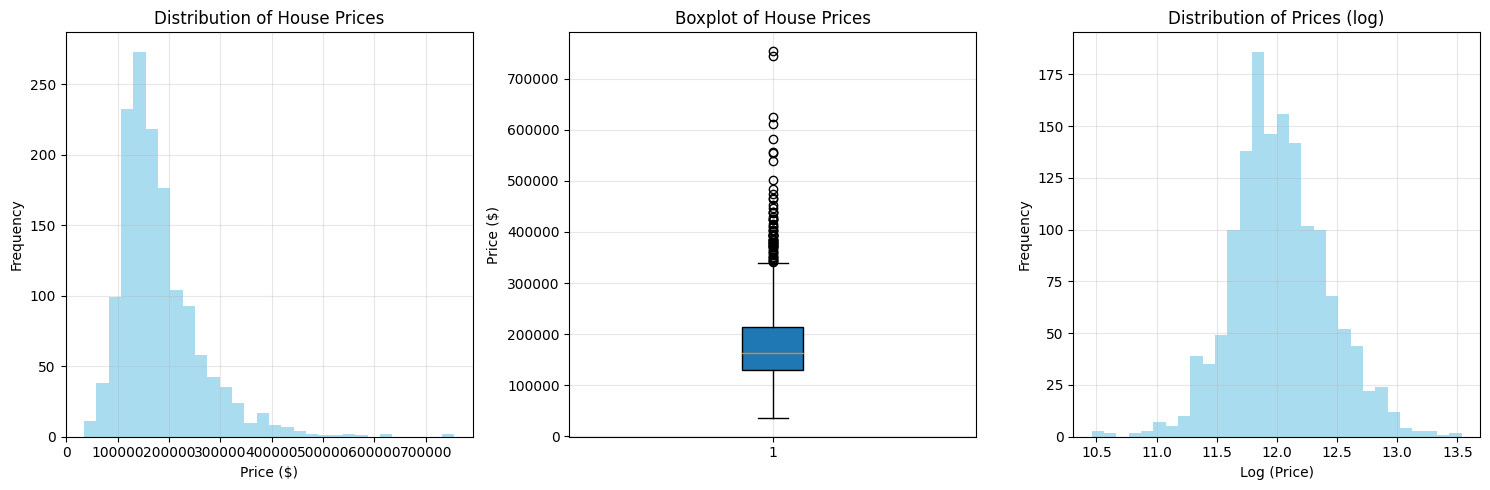

In [8]:
# Visualizing the distribution of house prices
plt.figure(figsize=(15, 5))

# Histogram of prices
plt.subplot(1, 3, 1)
plt.hist(df['SalePrice'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Boxplot of prices
plt.subplot(1, 3, 2)
plt.boxplot(df['SalePrice'], patch_artist=True)
plt.title('Boxplot of House Prices')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

# Log-scale distribution
plt.subplot(1, 3, 3)
plt.hist(np.log(df['SalePrice']), bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Prices (log)')
plt.xlabel('Log (Price)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.3 - Analysis of Missing Values

In [9]:
print("=== MISSING VALUES ANALYSIS ===")

# Calculate missing values per column
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print(f"Total columns: {df.shape[1]}")
print(f"Columns with missing values: {len(missing_data)}")
print(f"Percentage of columns with missing values: {len(missing_data) / df.shape[1] * 100:.1f}%")
print("\n" + "="*50)

# Show the 10 columns with the most missing values
print(f"\n Top 10 columns with the most missing values:")
for col in missing_data.head(10).index:
    missing_count = missing_data[col]
    missing_percent = (missing_count / len(df) * 100)
    print(f"{col}: {missing_count} missing values ({missing_percent:.1f}%)")

=== MISSING VALUES ANALYSIS ===
Total columns: 81
Columns with missing values: 19
Percentage of columns with missing values: 23.5%


 Top 10 columns with the most missing values:
PoolQC: 1453 missing values (99.5%)
MiscFeature: 1406 missing values (96.3%)
Alley: 1369 missing values (93.8%)
Fence: 1179 missing values (80.8%)
FireplaceQu: 690 missing values (47.3%)
LotFrontage: 259 missing values (17.7%)
GarageType: 81 missing values (5.5%)
GarageYrBlt: 81 missing values (5.5%)
GarageFinish: 81 missing values (5.5%)
GarageQual: 81 missing values (5.5%)


## 2.4 - Correlation Analysis

In [10]:
print("=== CORRELATION ANALYSIS ===")


# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)
print(f"Number of numeric variables: {len(numeric_cols)}")

print(f"\n Top 10 variables MOST correlated with SalePrice:")
for i, (col, corr) in enumerate(correlations.head(10).items()):
    print(f"{i+1}. {col}: {corr:.3f}")
    
print("\n Top 10 variables LEAST correlated with SalePrice:")
for i, (col, corr) in enumerate(correlations.tail(10).items()):
    print(f"{i+1}. {col}: {corr:.3f}")

=== CORRELATION ANALYSIS ===
Number of numeric variables: 38

 Top 10 variables MOST correlated with SalePrice:
1. SalePrice: 1.000
2. OverallQual: 0.791
3. GrLivArea: 0.709
4. GarageCars: 0.640
5. GarageArea: 0.623
6. TotalBsmtSF: 0.614
7. 1stFlrSF: 0.606
8. FullBath: 0.561
9. TotRmsAbvGrd: 0.534
10. YearBuilt: 0.523

 Top 10 variables LEAST correlated with SalePrice:
1. BsmtFinSF2: -0.011
2. BsmtHalfBath: -0.017
3. MiscVal: -0.021
4. Id: -0.022
5. LowQualFinSF: -0.026
6. YrSold: -0.029
7. OverallCond: -0.078
8. MSSubClass: -0.084
9. EnclosedPorch: -0.129
10. KitchenAbvGr: -0.136


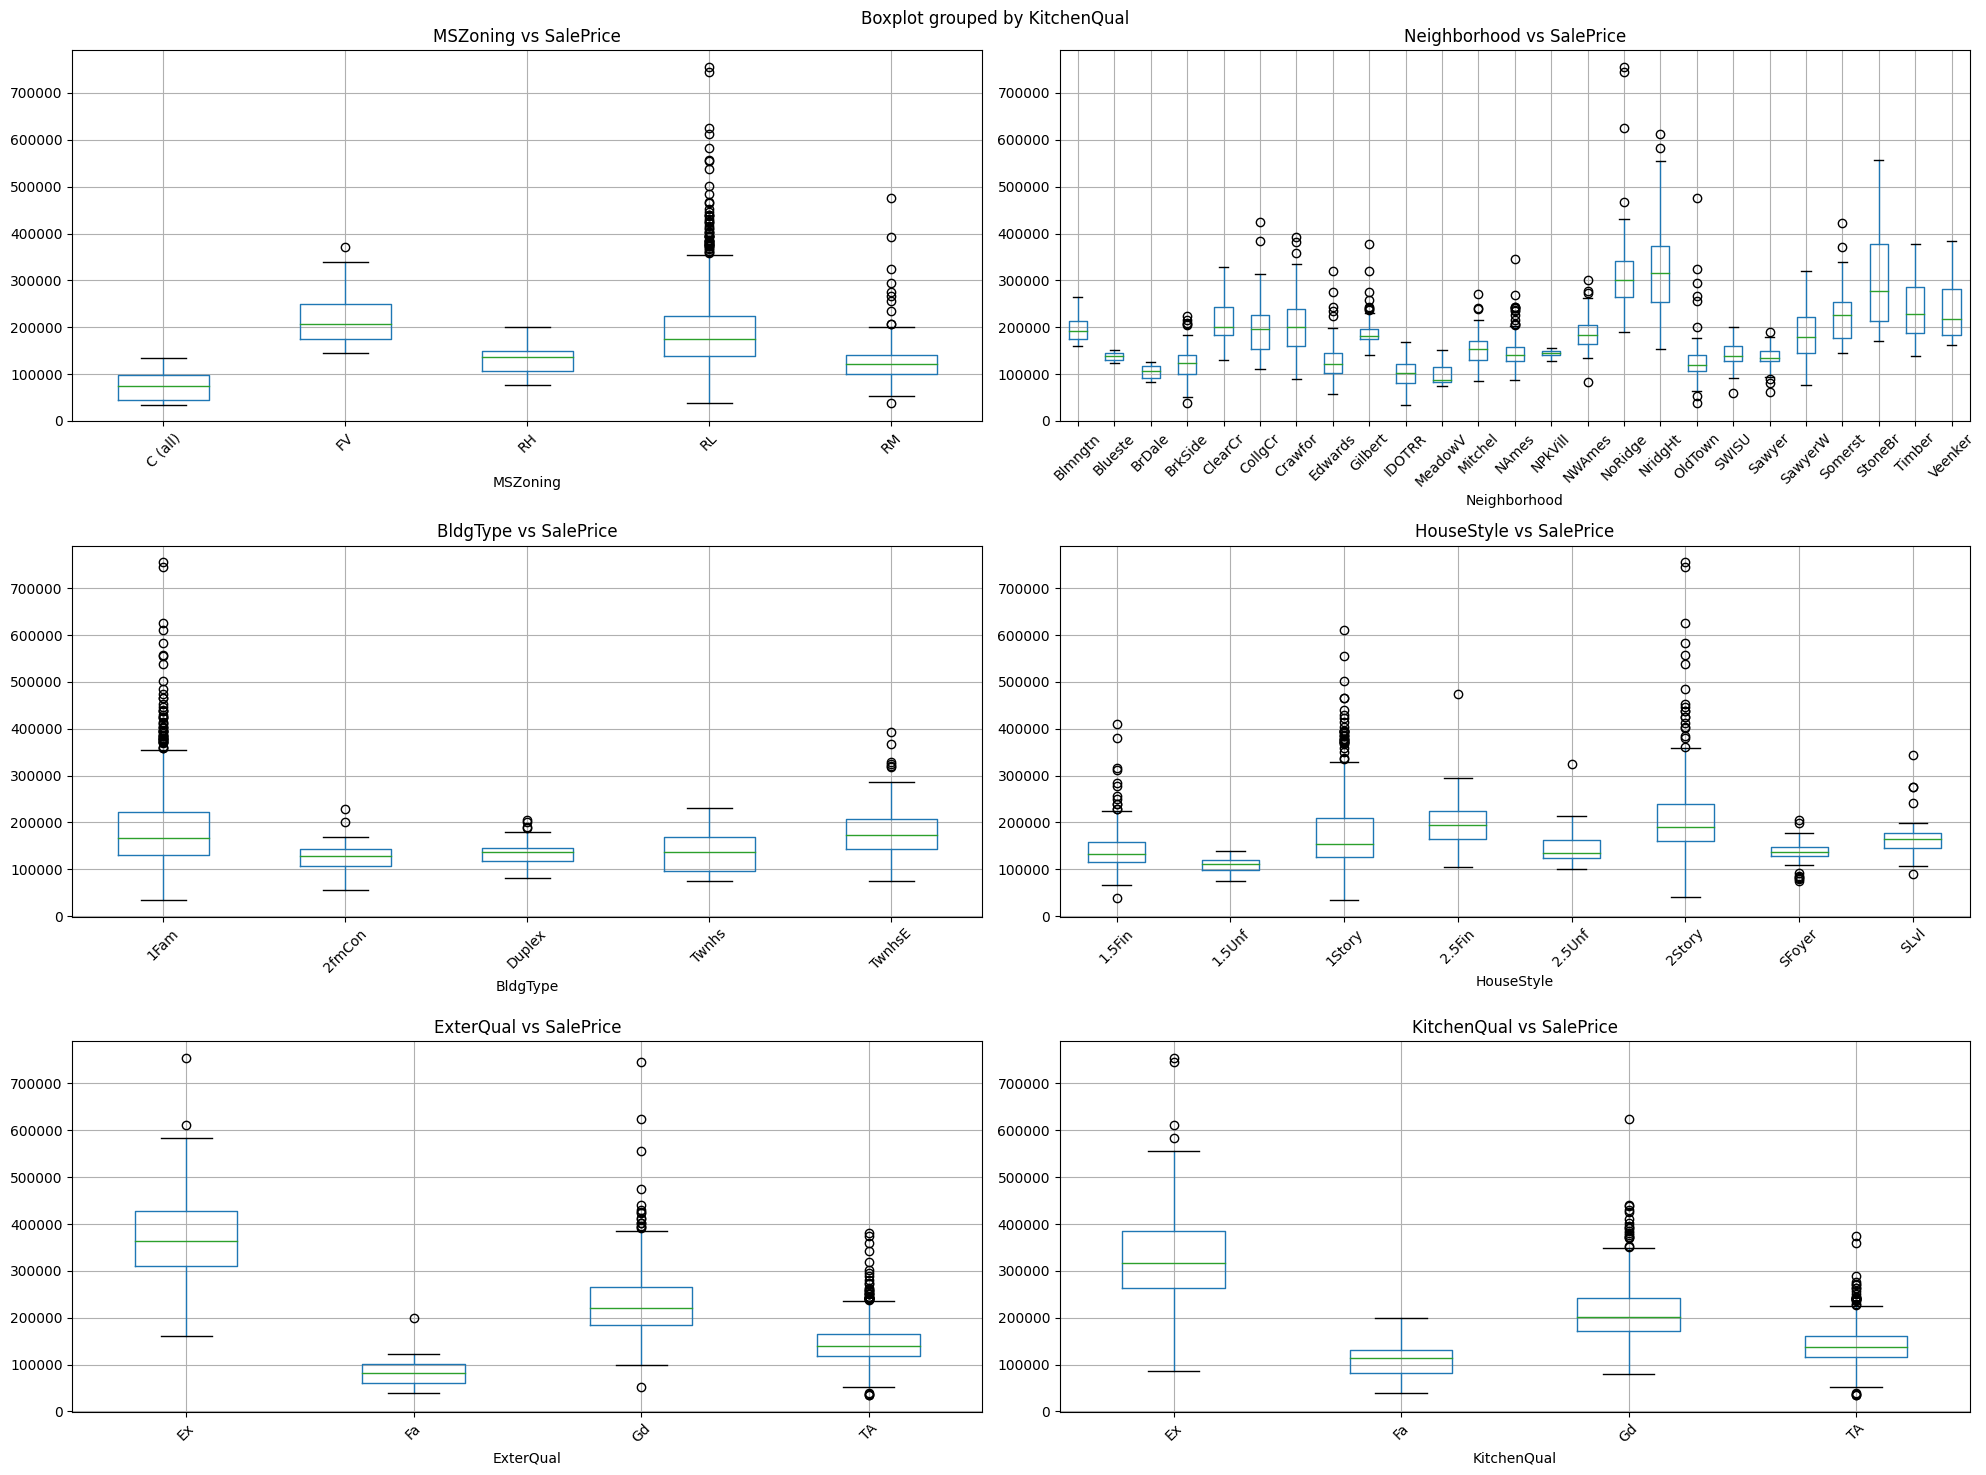


=== MSZoning ===
               mean    median  count
MSZoning                            
C (all)    74528.00   74700.0     10
FV        214014.06  205950.0     65
RH        131558.38  136500.0     16
RL        191004.99  174000.0   1151
RM        126316.83  120500.0    218

=== Neighborhood ===
                   mean    median  count
Neighborhood                            
Blmngtn       194870.88  191000.0     17
Blueste       137500.00  137500.0      2
BrDale        104493.75  106000.0     16
BrkSide       124834.05  124300.0     58
ClearCr       212565.43  200250.0     28
CollgCr       197965.77  197200.0    150
Crawfor       210624.73  200624.0     51
Edwards       128219.70  121750.0    100
Gilbert       192854.51  181000.0     79
IDOTRR        100123.78  103000.0     37
MeadowV        98576.47   88000.0     17
Mitchel       156270.12  153500.0     49
NAmes         145847.08  140000.0    225
NPkVill       142694.44  146000.0      9
NWAmes        189050.07  182900.0     73
NoRi

In [11]:
# Select some important categorical variables
categorical_cols = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'KitchenQual']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    df.boxplot(column='SalePrice', by=col, ax=plt.gca())
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistics by category for the first three variables
for col in categorical_cols[:3]:
    print(f"\n=== {col} ===")
    print(df.groupby(col)['SalePrice'].agg(['mean', 'median', 'count']).round(2))

## 2.5 - Analysis of Categorical Variables

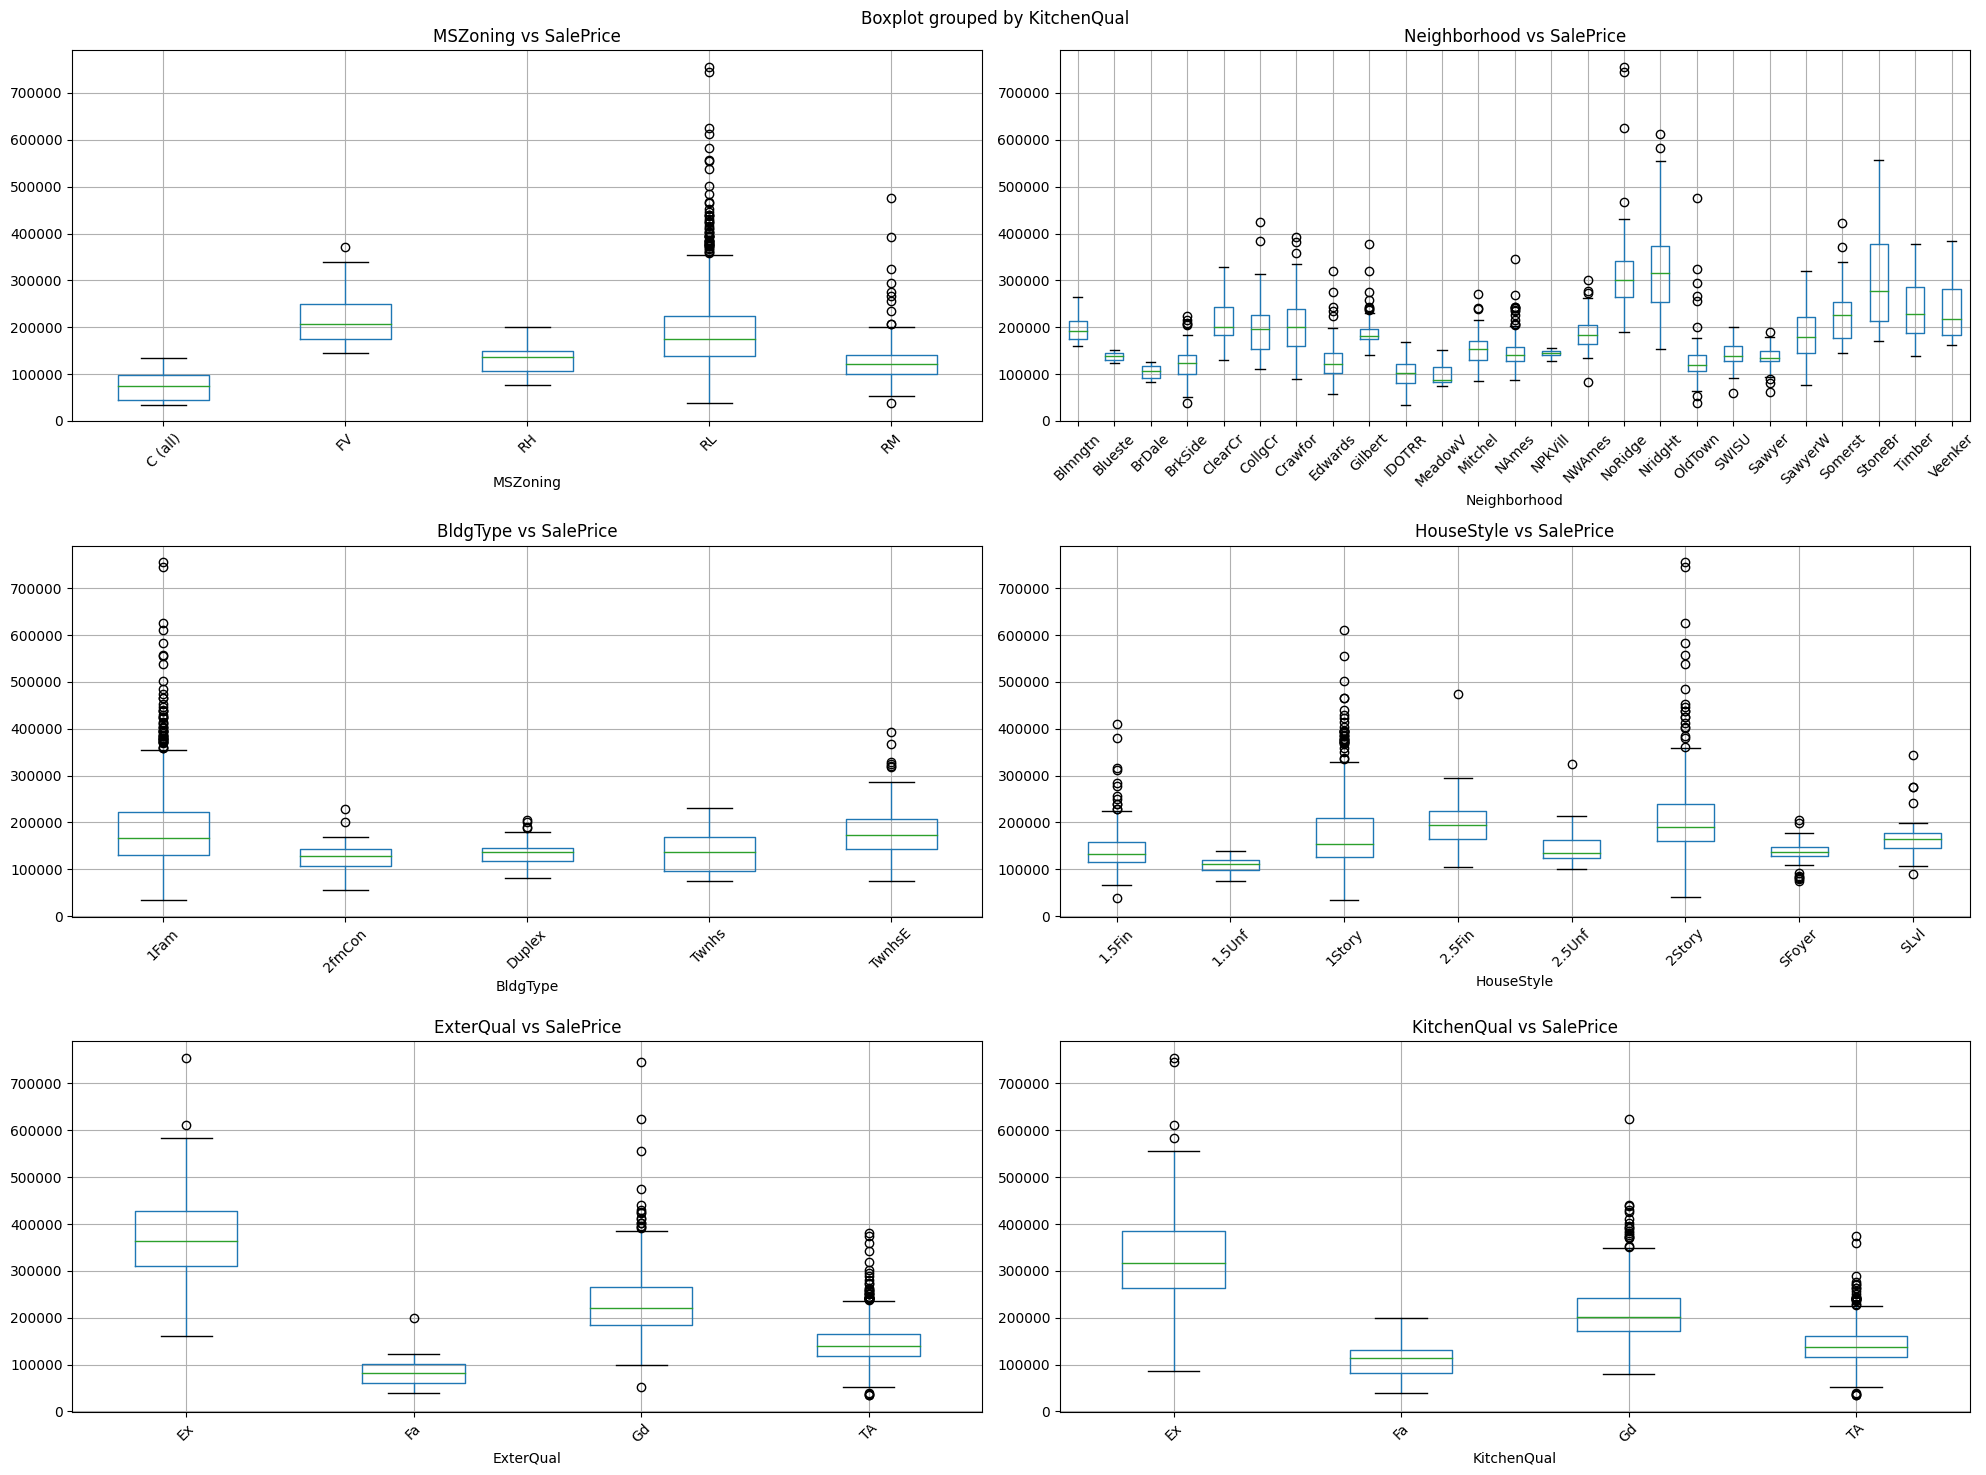

In [12]:
# Select some important categorical variables
categorical_cols = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'KitchenQual']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    df.boxplot(column='SalePrice', by=col, ax=plt.gca())
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.0 - Handling Missing Values

In [13]:
# Visualize the 15 columns with the most missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data.head(15))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
dtype: int64


In [14]:
# Remove columns with more than 50% missing values
limit = len(df) * 0.5
cols_to_drop = missing_data[missing_data > limit].index
df = df.drop(columns=cols_to_drop)

# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [15]:
print("Remaining missing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head())

Remaining missing values per column:
Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64


# 4.0 - Encoding Categorical Variables

## 4.1 - One-Hot Encoding of Categorical Variables

In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("Shape after One-Hot Encoding: ", df_encoded.shape)
df_encoded.head()

Shape after One-Hot Encoding:  (1460, 238)
 (1460, 238)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


## 4.2 - Separate Predictor Variable (X) and Target Variable (y)

In [17]:
# Split predictor variable (X) and target variable (y)
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1460, 237)
Shape of y: (1460,)


# 5.0 - Split into Train and Test (80% train, 20% test)

In [18]:
# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# 6.0 - Using the Linear Regression Model

## 6.1 - Training | Predicting | Evaluating the Model

In [19]:
# Train model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('''
What does it mean:
The average error of your model's predictions is about $52,000 compared to the actual house prices.
Interpretation: This value should be compared to the price range of the houses in your dataset. If most houses cost, for example, between $100,000 and $500,000, an error of $52,000 can be considered high.
''')
print(f"RMSE: {rmse:.2f}")

print('''
What does it mean:
Your model explains 64% of the variation in house prices.
Interpretation: This is not a bad value for a simple linear model, but it indicates there is still room for improvement. More complex models or data adjustments can increase this value.
''')
print(f"R²: {r2:.2f}")


What does it mean:
The average error of your model's predictions is about $52,000 compared to the actual house prices.
Interpretation: This value should be compared to the price range of the houses in your dataset. If most houses cost, for example, between $100,000 and $500,000, an error of $52,000 can be considered high.

RMSE: 52240.88

What does it mean:
Your model explains 64% of the variation in house prices.
Interpretation: This is not a bad value for a simple linear model, but it indicates there is still room for improvement. More complex models or data adjustments can increase this value.

R²: 0.64


## 6.2 - Relationship between Actual and Predicted Values

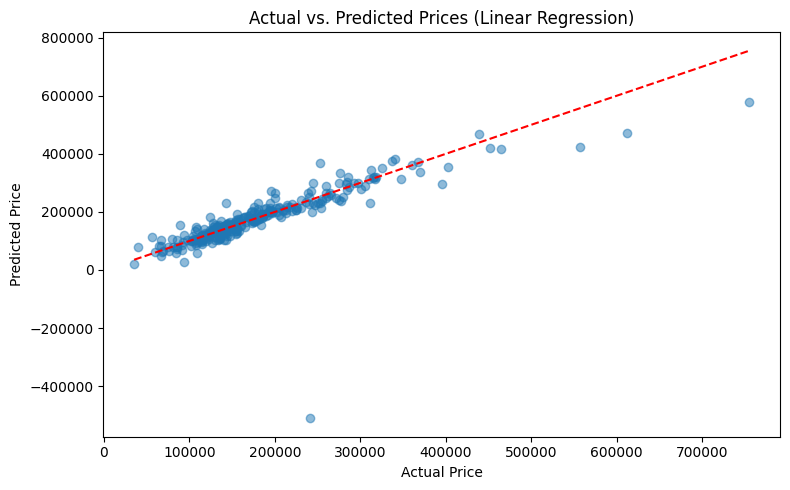

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

## 6.3 - Residual Analysis

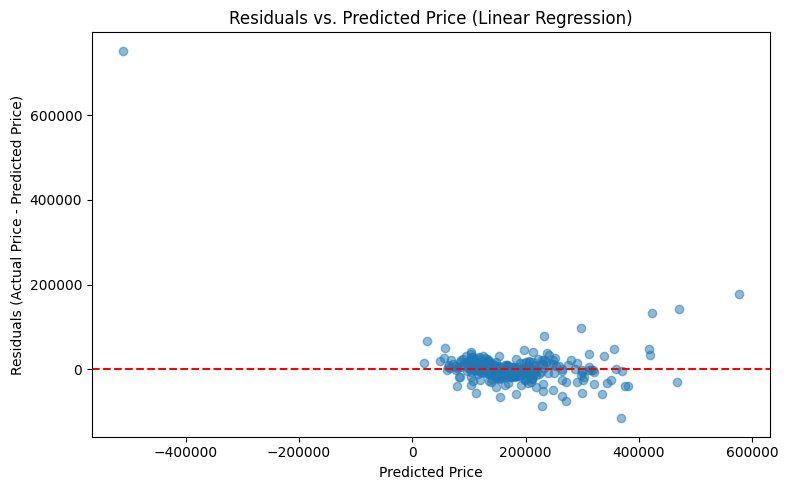

In [21]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle = '--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual Price - Predicted Price)")
plt.title("Residuals vs. Predicted Price (Linear Regression)")
plt.tight_layout()
plt.show()

## 6.4 - Feature Importance

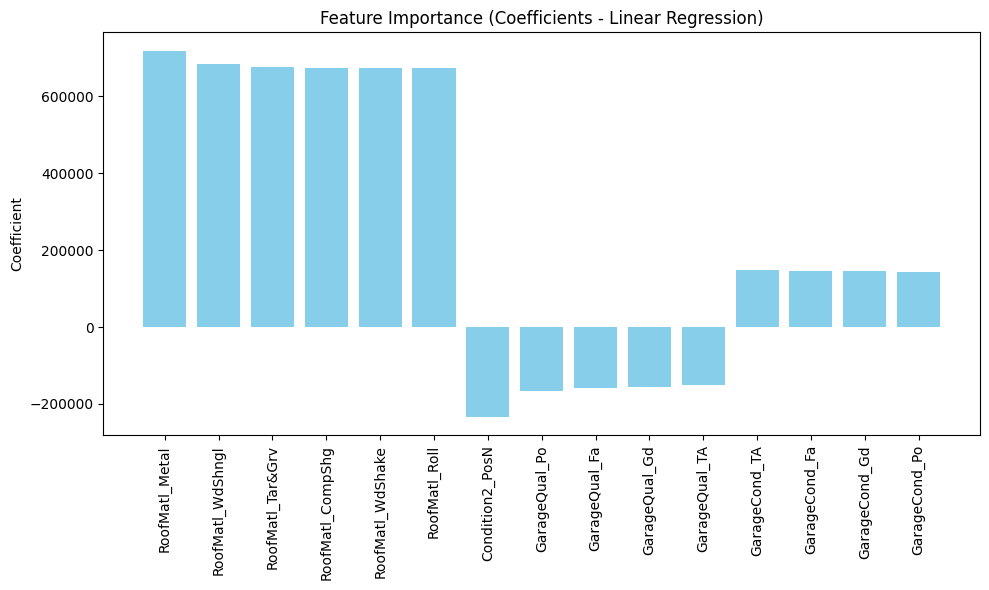

Top 15 most important features (by absolute value):
              Feature           Coef
112    RoofMatl_Metal  719164.079413
116  RoofMatl_WdShngl  685297.594863
114  RoofMatl_Tar&Grv  675927.054789
110  RoofMatl_CompShg  674949.350195
115  RoofMatl_WdShake  674116.845448
113     RoofMatl_Roll  672848.562623
90    Condition2_PosN -233954.107416
216     GarageQual_Po -167080.404414
214     GarageQual_Fa -157778.059951
215     GarageQual_Gd -154875.848842
217     GarageQual_TA -152082.866213
221     GarageCond_TA  149147.991705
218     GarageCond_Fa  147078.084344
219     GarageCond_Gd  145652.061361
220     GarageCond_Po  143582.130466


In [22]:
# Feature importance (Linear Regression)
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coef': model.coef_})
coef_df['AbsCoef'] = coef_df['Coef'].abs()
coef_df = coef_df.sort_values('AbsCoef', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(coef_df['Feature'][:15], coef_df['Coef'][:15], color='skyblue')
plt.xticks(rotation=90)
plt.title('Feature Importance (Coefficients - Linear Regression)')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

print('Top 15 most important features (by absolute value):')
print(coef_df[['Feature', 'Coef']].head(15))

# 7.0 - Using Random Forest

## 7.1 - Training | Predicting | Evaluating the Model

In [23]:
# Train model using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

RMSE: 29071.56
R²: 0.89


## 7.2 - Relationship between Actual and Predicted Values

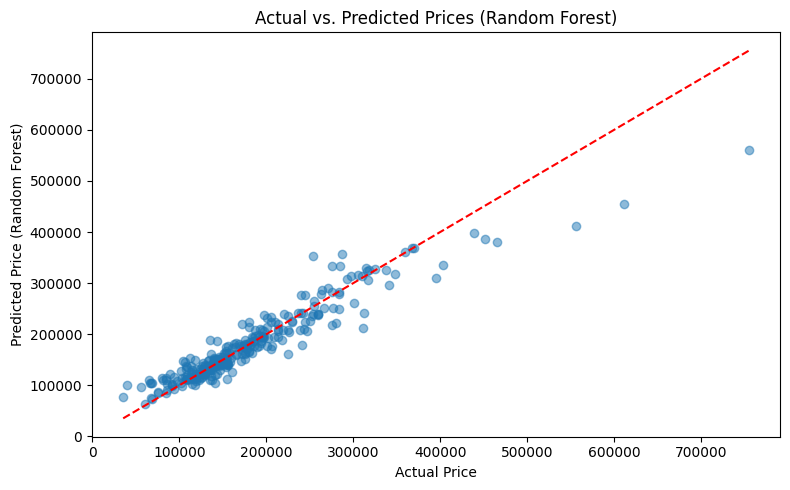

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Random Forest)")
plt.title("Actual vs. Predicted Prices (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

## 7.3 - Residual Analysis

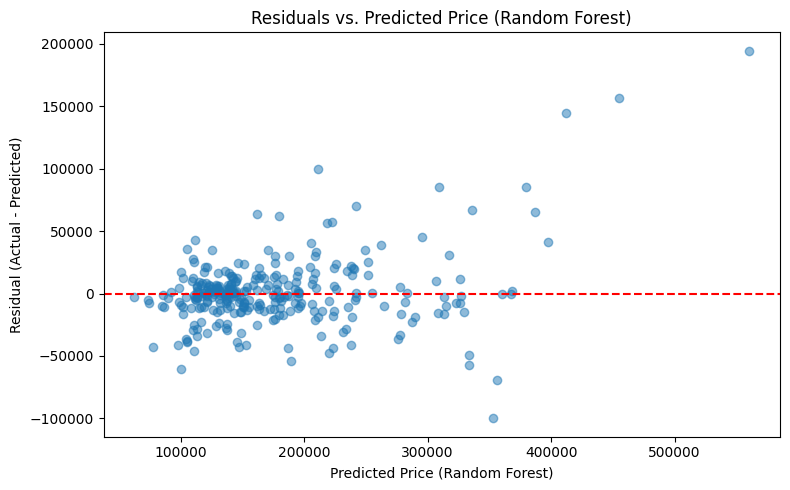

In [25]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (Random Forest)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs. Predicted Price (Random Forest)")
plt.tight_layout()
plt.show()

## 7.4 - Feature Importance

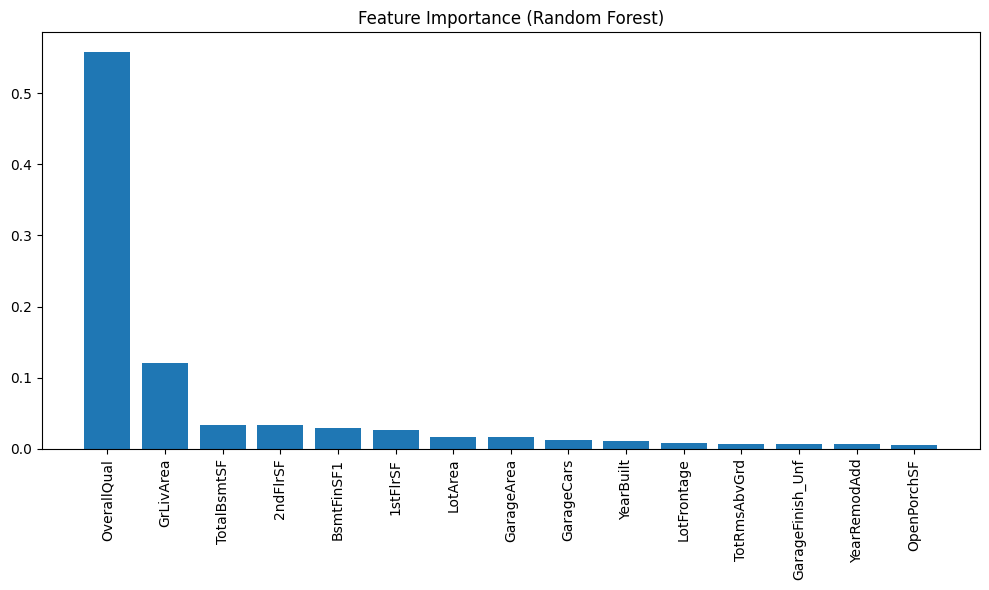

Top 15 most important features:
1. OverallQual: 0.5574
2. GrLivArea: 0.1213
3. TotalBsmtSF: 0.0342
4. 2ndFlrSF: 0.0338
5. BsmtFinSF1: 0.0294
6. 1stFlrSF: 0.0260
7. LotArea: 0.0173
8. GarageArea: 0.0162
9. GarageCars: 0.0124
10. YearBuilt: 0.0114
11. LotFrontage: 0.0082
12. TotRmsAbvGrd: 0.0070
13. GarageFinish_Unf: 0.0067
14. YearRemodAdd: 0.0063
15. OpenPorchSF: 0.0060


In [26]:
# Feature importance (Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(15), importances[indices][:15], align='center')
plt.xticks(range(15), feature_names[indices][:15], rotation=90)
plt.tight_layout()
plt.show()

print('Top 15 most important features:')
for f in range(15):
    print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

# 8.0 - Using XGBoost

## 8.1 - Training | Predicting | Evaluating the Model

In [27]:
df_encoded = pd.get_dummies(df, drop_first=True)
X_xgboost = df_encoded.drop('SalePrice', axis=1)
y_xgboost = df_encoded['SalePrice']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y_xgboost, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 31740.75
R²: 0.87


## 8.2 - Relationship between Actual and Predicted Values

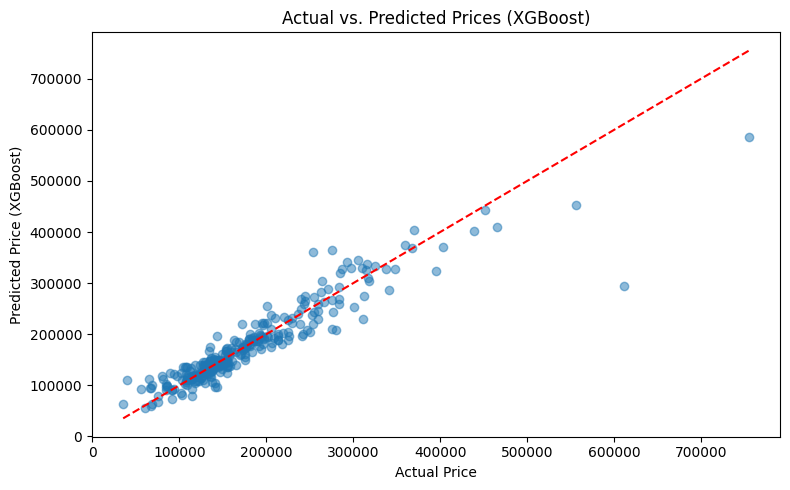

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (XGBoost)")
plt.title("Actual vs. Predicted Prices (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

## 8.3 - Residual Analysis

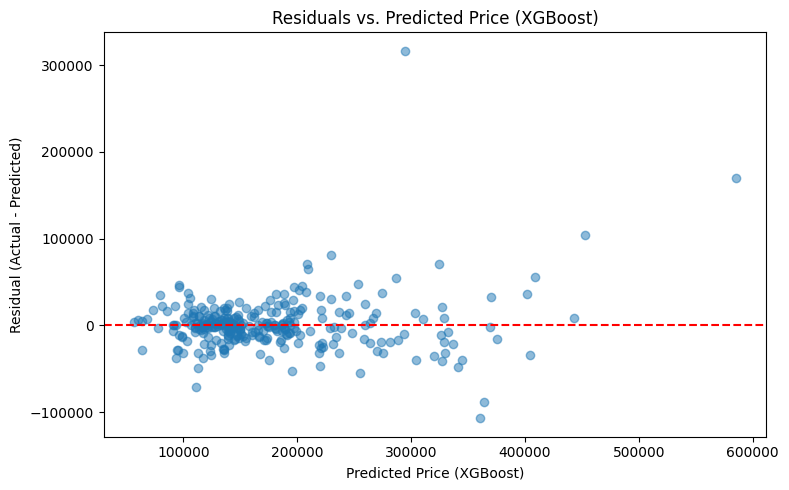

In [29]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (XGBoost)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs. Predicted Price (XGBoost)")
plt.tight_layout()
plt.show()

## 8.4 - Feature Importance

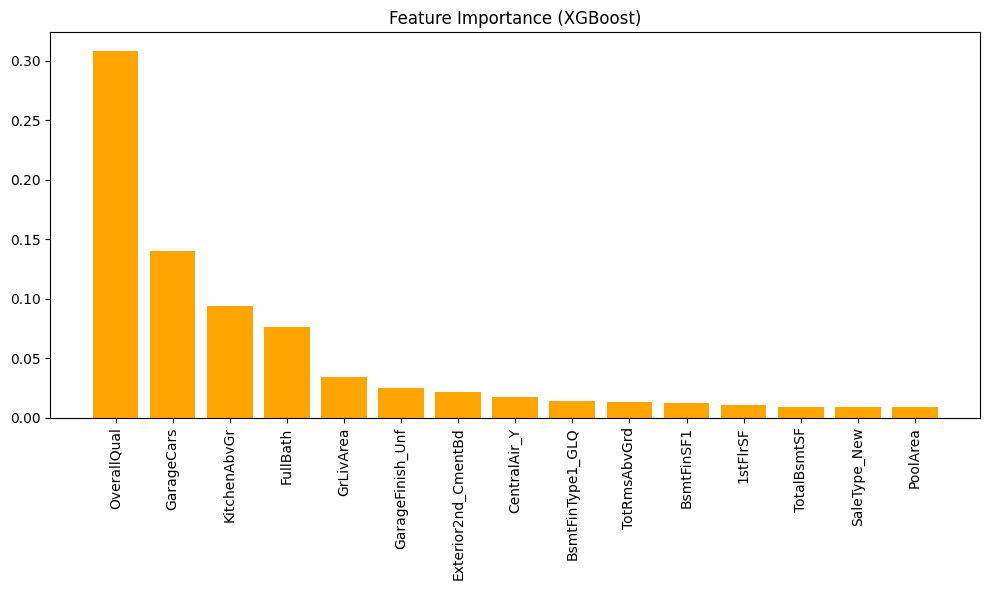

Top 15 most important features:
1. OverallQual: 0.3085
2. GarageCars: 0.1404
3. KitchenAbvGr: 0.0939
4. FullBath: 0.0759
5. GrLivArea: 0.0340
6. GarageFinish_Unf: 0.0251
7. Exterior2nd_CmentBd: 0.0213
8. CentralAir_Y: 0.0175
9. BsmtFinType1_GLQ: 0.0138
10. TotRmsAbvGrd: 0.0130
11. BsmtFinSF1: 0.0124
12. 1stFlrSF: 0.0106
13. TotalBsmtSF: 0.0093
14. SaleType_New: 0.0092
15. PoolArea: 0.0092


In [30]:
# Feature importance (XGBoost)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(15), importances[indices][:15], align='center', color='orange')
plt.xticks(range(15), feature_names[indices][:15], rotation=90)
plt.tight_layout()
plt.show()

print('Top 15 most important features:')
for f in range(15):
    print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

# 9.0 - Feature Importance

This shows which features most influence house prices.

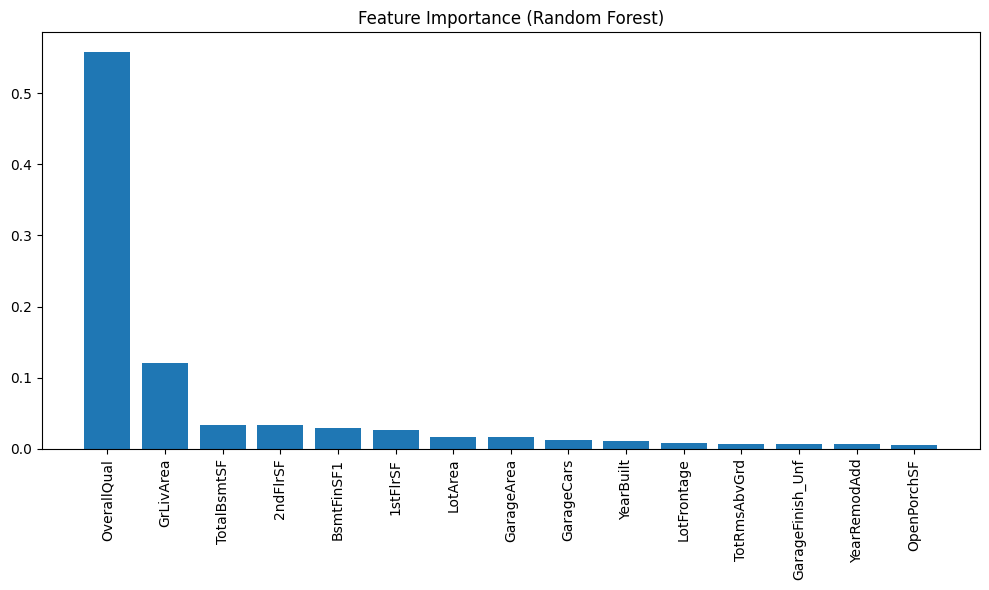

1. OverallQual: 0.5574
2. GrLivArea: 0.1213
3. TotalBsmtSF: 0.0342
4. 2ndFlrSF: 0.0338
5. BsmtFinSF1: 0.0294
6. 1stFlrSF: 0.0260
7. LotArea: 0.0173
8. GarageArea: 0.0162
9. GarageCars: 0.0124
10. YearBuilt: 0.0114
11. LotFrontage: 0.0082
12. TotRmsAbvGrd: 0.0070
13. GarageFinish_Unf: 0.0067
14. YearRemodAdd: 0.0063
15. OpenPorchSF: 0.0060


In [31]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Show the 15 most important features
plt.figure(figsize=(10,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(15), importances[indices][:15], align='center')
plt.xticks(range(15), feature_names[indices][:15], rotation=90)
plt.tight_layout()
plt.show()

for f in range(15):
    print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

# 10.0 - Hyperparameter Tuning

What does hyperparameter tuning mean?
Hyperparameters are model settings you define before training (for example: number of trees, maximum depth, etc). Tuning hyperparameters means testing various combinations of these values to find the one that yields the best performance.

In [32]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the base model
rf = RandomForestRegressor(random_state=42)

# GridSearch to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=1, scoring='neg_root_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END ma

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=2)

## 10.1 - Testing the Best Combinations

In [33]:
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate the optimized model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"RMSE (Optimized Random Forest): {rmse_best:.2f}")
print(f"R² (Optimized Random Forest): {r2_best:.2f}")

Best hyperparameters found:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RMSE (Optimized Random Forest): 29168.50
R² (Optimized Random Forest): 0.89


# 11.0 - Feature Engineering

In [34]:
# 1.0 Age of the house
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# 2.0 Age since last remodel
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

# 3.0 Total built area
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# 4.0 Total bathroom area (full bath = 1, half bath = 0.5)
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']

# 5.0 Whether the house has a finished basement
# (Note: This logic may need adjustment based on your data)
df['HasFinishedBasement'] = df['BsmtFinSF1'].isin(['GLC', 'ALQ', 'BLQ', 'Rec', 'LwQ']).astype(int)

# View the new features
df[['HouseAge', 'RemodAge', 'TotalSF', 'TotalBath','HasFinishedBasement']].head()

,HouseAge,RemodAge,TotalSF,TotalBath,HasFinishedBasement
0,5,5,2566,3.5,0
1,31,31,2524,2.5,0
2,7,6,2706,3.5,0
3,91,36,2473,2.0,0
4,8,8,3343,3.5,0


# 12.0 - Using Newly Created Features

## 12.1 - Transforming DataFrame into Vector

In [35]:
df_encoded = pd.get_dummies(df, drop_first=True)

## 12.2 - Separate Predictor Variables (X) and Target (y)

In [36]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

## 12.3 - Split into Train and Test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# 13.0 - Training Model

## Split predictor variable (X) and target variable (y)


In [38]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

## 13.1 - Linear Regression

In [39]:
# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Train model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 52240.88
R²: 0.64


## 13.2 - Random Forest

In [40]:
# Training model using Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 29670.44
R²: 0.89


### 13.3 - Check Overfitting in Random Forest

In [41]:
# After training the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== TRAINING EVALUATION ===")
print(f"Train - RMSE: {rmse:.2f}")
print(f"Train - R²: {r2:.2f}")

# Test evaluation (already done)
print("\n=== TEST EVALUATION ===")
print(f"Test - RMSE: {rmse:.2f}")
print(f"Test - R²: {r2:.2f}")

=== TRAINING EVALUATION ===
Train - RMSE: 29670.44
Train - R²: 0.89

=== TEST EVALUATION ===
Test - RMSE: 29670.44
Test - R²: 0.89


# 14.0 - Conclusion

In this project, we performed a complete analysis of house price data, from initial exploration, data cleaning, creation of new features, to the application and comparison of different machine learning models (Linear Regression, Random Forest, and XGBoost). More complex models, such as Random Forest and XGBoost, showed better performance compared to linear regression, highlighting the importance of exploring more robust algorithms for real-world problems.

The feature importance analysis allowed us to identify the factors that most influence house prices, providing valuable insights for the real estate market. The project also demonstrated the usefulness of feature engineering techniques and hyperparameter tuning to improve model performance.